In [2]:
#Importing Temperature Prediction Model
import warnings
warnings.filterwarnings('ignore')

from sklearn.externals import joblib
TEMP = joblib.load(r'C:\Users\Mayank\Weather Prediction AI Project\Trained Models\TRandomForest.pkl')

'''Comment for myself
T takes 7 argument to predict the temperature
in sequential order they are Date, Month, Hour, current heatindex, humidity, rain, temperature 6 hours ago'''

'Comment for myself\nT takes 7 argument to predict the temperature\nin sequential order they are Date, Month, Hour, current heatindex, humidity, rain, temperature 6 hours ago'

In [3]:
#Importing Precipitation Prediction Model

PREC = joblib.load(r'C:\Users\Mayank\AI Project for Weather Prediction\Trained Models\PLogisticRegression.pkl')
PPP = joblib.load(r'C:\Users\Mayank\AI Project for Weather Prediction\Trained Models\PRandomForest.pkl')

'''Comment for myself
P takes 7 argument to predict the precipitation
in sequential order they are Date, Month, Hour, current dewpoint, humidity, thunder, whether it rained 6 hours ago'''

'Comment for myself\nP takes 7 argument to predict the precipitation\nin sequential order they are Date, Month, Hour, current dewpoint, humidity, thunder, whether it rained 6 hours ago'

In [4]:
#Importing Humidity Predcition Model
from sklearn.externals import joblib
HUM = joblib.load(r'C:\Users\Mayank\Weather Prediction AI Project\Machine Learning Models\Predicting Humidity\HPolynomialRegression.pkl')

'''Comment for myself
T takes 8 argument to predict the humidity
in sequential order they are Date, Month, Hour, dewpt, heatindex, temp, rain, humidity previous'''

'Comment for myself\nT takes 8 argument to predict the humidity\nin sequential order they are Date, Month, Hour, dewpt, heatindex, temp, rain, humidity previous'

In [5]:
#Importing all major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [1]:
#%run C:\Users\Mayank\Weather Prediction AI Project\Machine Learning Models\Arduino Control.ipynb

ERROR:root:File `'C:\\Users\\Mayank\\Weather.py'` not found.


In [47]:
#Code to be runned with Arduino in connection

import serial
import time

# set up the serial line
ser = serial.Serial('COM4', 9600)
time.sleep(2)

# Read and record the data
data =[]                       # empty list to store the data
for i in range(1):
    b = ser.readline()         # read a byte string
    string_n = b.decode()  # decode byte string into Unicode  
    string = string_n.rstrip() # remove \n and \r       # convert string to float
    print(string)
    data.append(string)           # add to the end of data list
    time.sleep(0.1)            # wait (sleep) 0.1 seconds

ser.close()

l=[]

for line in data:
    l.append(data)
    print(line)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data)
plt.xlabel('Time (seconds)')
plt.ylabel('Potentiometer Reading')
plt.title('Potentiometer Reading vs. Time')
plt.show()

30

In [ ]:
#Code to split and use the data for predictions

#The code will be modified based on type of Data

# show the data
    
s=l[0]
print(s)
l=s[0].split()
h=float(l[1])
t=int(l[3])


In [6]:
#Dew Point

def ln(n):
    return math.log(n,math.e)
def Tdew(T,H):
    nl =ln(H/100)
    s=237.3+T
    m=17.27*T
    TD = (237.3*(nl+(m/s)))/(17.27+(-1)*(nl+(m/s)))    
    return TD

In [7]:
#Heat Index

def HI(t,H):
    c1 = -42.379
    c2= 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -6.83783 *(0.001)
    c6 = -5.481717 * (0.01)
    c7 = 1.22874 * (0.001)
    c8 = 8.5282 * (0.0001)
    c9 = -1.99 * (0.000001)
    T=(1.8*t)+32
    HI=c1+(c2*T)+(c3*H)+(c4*T*H)+(c5*T*T)+(c6*H*H)+(c7*T*H*T)+(c8*T*H*H)+(c9*T*H*T*H)
    FHI=((HI-32)*5)/9
    return FHI

In [145]:
#poly = joblib.load(r'C:\Users\Mayank\Weather Prediction AI Project\Trained Models\Poly.pkl')

In [8]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)

In [22]:
#Taking all the initial variables with their values some value are taken as input which need to be changed
# upon integration with Hardware

#t=int(input("Enter the temperature in Celsuius:"))
#h=int(input("Enter the relative humidity: "))
p=int(input("Tell whether it is raining presently or not, 0 for no and 1 for yes: "))


Enter the temperature in Celsuius:36
Enter the relative humidity: 67
Tell whether it is raining presently or not, 0 for no and 1 for yes: 0


In [23]:
#For hourly, daily, weekly and min max temp details
L=[]

from datetime import datetime
datetime.today()
date=datetime.now()

da=date.day
hr=date.hour
mn=date.month

In [24]:
#t6,h6,p6 are for 6 hours ago
t6=38
h6=60
p6=0

#RH,P,T are for current data
RH=h
P=p
T=t
print(RH,P,T)

#Variables and list for data  (d stands for day)
dd=[]
hdd=[]
td=[]
hd=[]
pd=[]


#Variables and list for data  (r stands for representation)
DR=[]
HRR=[]
TR=[]
HR=[]
PR=[]

#Calculating Maximum and minimum temperatures
MxT=[]
MnT=[]


for d in range(0,11):
    for h in range(0,5):
        
        #TP,PP,HP are for 1 hour in future data
        
        dewpoint=Tdew(T,RH)
        print("Dew Point at",hr,da,mn,"is equal to",dewpoint)
                
        heatindex=HI(T,RH)
        print("Heat Index at",hr,da,mn,"is equal to",heatindex)
        
        t_=np.array([da,mn,hr,heatindex,RH,P,t6]).reshape(1,-1)
        TP=list(TEMP.predict(t_))[0]
        #TP=list(TEMP.predict(poly.fit_transform(t_)))[0]
        print("Temperature predicted at",hr,da,mn,"is equal to",TP)
        
        p_=np.array([da,mn,hr,dewpoint,RH,1,p6]).reshape(1,-1)
        PP=list(PREC.predict(p_))[0]
        print("Precipitation predicted at",hr,da,mn,"is equal to",PP)
        
        h_=np.array([da,mn,hr,dewpoint,heatindex,T,P,h6]).reshape(1,-1)
        #HP=list(HUM.predict(h_))[0]
        HP=list(HUM.predict(poly.fit_transform(h_)))[0]
        print("Humidity predicted at",hr,da,mn,"is equal to",HP)
        
        print("")
        print("")
        
        #Converting array to no.
        #HP=list(HP)[0]
        #TP=list(TP)[0]
        #PP=list(PP)[0]
        
        #Adding prediction for a day list to take the mean
        dd.append(dewpoint)
        hdd.append(heatindex)
        td.append(TP)
        hd.append(HP)
        pd.append(PP)
        
        
        #Upddating THE previous variables
        t6=T
        h6=RH
        p6=P
                
        T=TP
        RH=HP
        P=PP
                
        #Updating Date and Time is final
        hr+=6
        if hr>=24:
            hr=0
            h=24
            da+=1
        if da==31:
            mn+=1
            da=1
    
    #Calculating mean of all the variables for a day
    DR.append(np.mean(dd))
    HRR.append(np.mean(hdd))
    TR.append(np.mean(td))
    HR.append(np.mean(hd))
    PR.append(np.mean(pd))
    
    #Calculating Maximum and Minimum Temperature
    MxT.append(max(td))
    MnT.append(min(td))
    
    dd.clear()
    hdd.clear()
    td.clear()
    hd.clear()
    pd.clear()
    
    
        


67 0 36
Dew Point at 17 30 6 is equal to 28.89079906674583
Heat Index at 17 30 6 is equal to 52.24120294755559
Temperature predicted at 17 30 6 is equal to 35.98
Precipitation predicted at 17 30 6 is equal to 1
Humidity predicted at 17 30 6 is equal to 66.82752963320672


Dew Point at 23 30 6 is equal to 28.827274667200097
Heat Index at 23 30 6 is equal to 52.06041460081966
Temperature predicted at 23 30 6 is equal to 35.98
Precipitation predicted at 23 30 6 is equal to 1
Humidity predicted at 23 30 6 is equal to 60.57065620065896


Dew Point at 0 1 7 is equal to 27.13917233858319
Heat Index at 0 1 7 is equal to 48.390041320003455
Temperature predicted at 0 1 7 is equal to 36.0
Precipitation predicted at 0 1 7 is equal to 1
Humidity predicted at 0 1 7 is equal to 64.16597146098593


Dew Point at 6 1 7 is equal to 28.14562254662581
Heat Index at 6 1 7 is equal to 50.520683871851276
Temperature predicted at 6 1 7 is equal to 36.0
Precipitation predicted at 6 1 7 is equal to 1
Humidity pr

Temperature predicted at 18 8 7 is equal to 34.75
Precipitation predicted at 18 8 7 is equal to 0
Humidity predicted at 18 8 7 is equal to 26.940242648317508


Dew Point at 0 9 7 is equal to 12.961043637856033
Heat Index at 0 9 7 is equal to 33.74823340005422
Temperature predicted at 0 9 7 is equal to 34.27
Precipitation predicted at 0 9 7 is equal to 0
Humidity predicted at 0 9 7 is equal to 27.369325645910067


Dew Point at 6 9 7 is equal to 12.795734679740134
Heat Index at 6 9 7 is equal to 33.19935189451488
Temperature predicted at 6 9 7 is equal to 34.13
Precipitation predicted at 6 9 7 is equal to 0
Humidity predicted at 6 9 7 is equal to 26.10343656205623


Dew Point at 12 9 7 is equal to 11.956996950818352
Heat Index at 12 9 7 is equal to 32.83086368682212
Temperature predicted at 12 9 7 is equal to 33.99
Precipitation predicted at 12 9 7 is equal to 0
Humidity predicted at 12 9 7 is equal to 26.340147826601424


Dew Point at 18 9 7 is equal to 11.975732364802663
Heat Index at 

In [25]:
DR=np.array(DR)
HRR=np.array(HRR)
TR=np.array(TR)
HR=np.array(HR)
PR=np.array(PR)
MxT=np.array(MxT)
MnT=np.array(MnT)

In [130]:
#Data Representation
#Date
#Min Max Temperature
#Precipitation percentage
#Humidity
#Dew point
#Heat index  + at end All the graphs

In [28]:
da=date.day
mn=date.month
yr=date.year

if da==31:
    mn+=1
    da=1

''''def Gen():
    for i in range(1,15):
        yield i
x=Gen() '''

for i in range(10):
    print("Date"," ",da,"-",mn,"-",yr,sep='')
    print("")
    print("Maximum Temperature is:",MxT[i])
    print("Minimum Temperature is:",MnT[i])
    if PR[i]>0:
        print("It will rain probability is",PR[i]*100,'%')
    else:
        print("It will not rain")
    print("Dew point is:",DR[i])
    print("Heat Index is:",HRR[i])
    print("Humidity is:",HR[i],'%')
    
    print()
    print()
    
    i+=1
    da+=1
    
    
    if da==31:
        mn = mn+1
        da=1
    

Date 30-6-2020

Maximum Temperature is: 36.0
Minimum Temperature is: 35.98
It will rain probability is 100.0 %
Dew point is: 28.41840993218263
Heat Index is: 51.187330035402354
Humidity is: 65.56205062431636 %


Date 1-7-2020

Maximum Temperature is: 35.98
Minimum Temperature is: 35.43
It will rain probability is 100.0 %
Dew point is: 27.157036301398705
Heat Index is: 48.15926077734093
Humidity is: 57.72349556015797 %


Date 2-7-2020

Maximum Temperature is: 36.0
Minimum Temperature is: 35.98
It will rain probability is 100.0 %
Dew point is: 23.3497794319055
Heat Index is: 42.49385628259081
Humidity is: 47.569210692102935 %


Date 3-7-2020

Maximum Temperature is: 36.19
Minimum Temperature is: 34.42
It will rain probability is 60.0 %
Dew point is: 17.210321516471495
Heat Index is: 37.034106521755966
Humidity is: 30.834364925624868 %


Date 4-7-2020

Maximum Temperature is: 34.78
Minimum Temperature is: 33.62
It will not rain
Dew point is: 12.037822552408254
Heat Index is: 33.0711137449

Dew Point


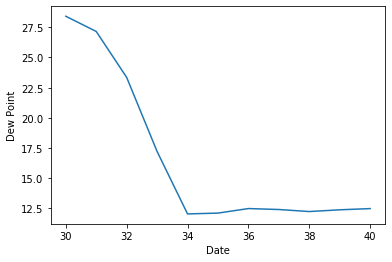

Heat Index


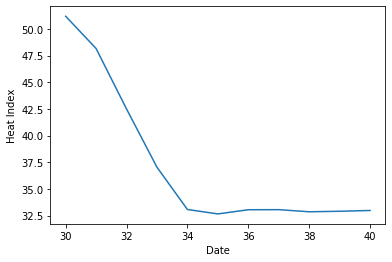

Temperature


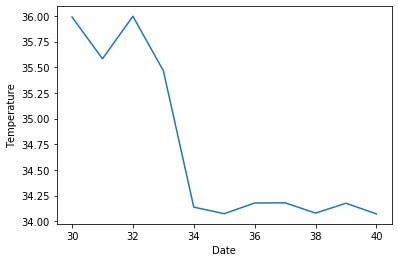

Precipitation chances


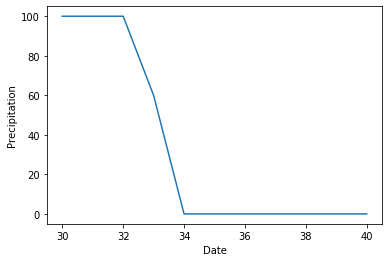

Humidity


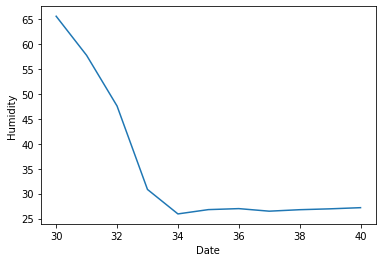

In [26]:
da=date.day
Day=np.arange(30,41)

#Plotting Dew Point
print("Dew Point")
plt.xlabel("Date")
plt.ylabel("Dew Point")
plt.plot(Day,DR)
plt.show()

#Plotting Heat Index
print("Heat Index")
plt.xlabel("Date")
plt.ylabel("Heat Index")
plt.plot(Day,HRR)
plt.show()

#Plotting Temperature
print("Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.plot(Day,TR)
plt.show()

#Plotting Precipitation
print("Precipitation chances")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.plot(Day,PR*100)
plt.show()

#Plotting Humidity
print("Humidity")
plt.xlabel("Date")
plt.ylabel("Humidity")
plt.plot(Day,HR)
plt.show()

In [14]:
DR

array([20.29100184, 14.59192199])